In [2]:
#import neurokit2 as nk
## enlever le commentaire pour neurokit2 pour l'utiliser
import heartpy as hp
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import scipy as sci

In [3]:
## fonction pour vérifier si un fichier existe et qu'il n'est pas vide à partir du chemin du fichier
## retourne True si le fichier existe et n'est pas vide sinon retourne False
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

In [53]:
path_participant= 'test/' # chemin du dossier pour les fichiers empatica

## Partie analyse cardiaque

In [41]:
## ouverture du fichier BVP et tag du dossier spécifié 
## à adapter avec l'arborescence de vos données

df_bvp= pd.read_csv(path_participant + 'BVP.csv', header= None)
df_tag= pd.read_csv(path_participant + 'tags.csv', header=None)
## header= None permet de ne pas lire la première partie du fichier CSV comme le nom de la colonne 
## vu que la première la ligne est la date et le temps de départ du bracelet Empatica

In [42]:
df_bvp

,0
0,1.615122e+09
1,6.400000e+01
2,-0.000000e+00
3,-0.000000e+00
4,-0.000000e+00
5,-0.000000e+00
6,-0.000000e+00
7,-0.000000e+00
8,-0.000000e+00
9,-0.000000e+00


In [7]:
df_tag

,0
0,1.615122e+09
1,1.615123e+09


In [43]:
# on stocke le temps de départ dans une variable
# on le convertit en même temps en format datetime pour le calcul des différences de temps après
start_date= pd.to_datetime(df_bvp.loc[0], unit= 's')[0]
freq= df_bvp.loc[1, 0] # on stocke la fréquence d'échantillonnage du fichier contenue à la deuxième ligne
df_bvp= df_bvp.loc[2:] # on supprime ces 2 première lignes du tableau pour ne garder que le signal brut

In [44]:
df_tag[0]=pd.to_datetime(df_tag[0], unit= 's') # on convertir le fichier de tag en format datetime également
df_tag

,0
0,2021-03-07 12:59:30.329999924
1,2021-03-07 13:09:32.089999914


In [45]:
# on calcule le temps écoulé en secondes entre le démarrage de la montre et le premier tag
timer_Tostart= (df_tag.loc[0,0] - start_date).total_seconds()
# on multiplie ce temps par la fréquence pour avoir l'index de la mesure où l'enregistrement qui nous intéresse COMMENCE
index_start= round(timer_Tostart) * freq
# on calcule le temps écoulé en secondes entre le démarrage de la montre et le dernier tag
timer_Tostop= (df_tag.iloc[-1, 0] - start_date).total_seconds()
# on multiplie ce temps par la fréquence pour avoir l'index de la mesure où l'enregistrement qui nous intéresse TERMINE
index_stop= round(timer_Tostop) * freq

In [46]:
# on reset le numéro des index pour bien reprendre à 0
df_bvp= df_bvp.reset_index(drop= True)

In [47]:
df_bvp= df_bvp.loc[index_start:index_stop] # on récupère donc uniquement le signal qui nous intéresse entre les 2 tags
df_bvp

,0
7744,-12.73
7745,-14.77
7746,-16.01
7747,-16.19
7748,-15.20
7749,-13.11
7750,-10.23
7751,-6.98
7752,-3.73
7753,-0.75


In [48]:
## filtre du signal avec filtre bandpass butterworth d'ordre 3 et avec comme fréquence critique (0.7, 3.5)
## ces fréquences critiques permettent de retirer le signal correspondant à une fréquence cardiaque <= 40 bpm ou >= 210 bpm
filtered= hp.filter_signal(df_bvp[0], cutoff= (0.7, 3.5), sample_rate= freq, order= 3, filtertype= 'bandpass')

## analyse du signal bvp par la librairie heartpy
## wd va stocker le signal analysé et m les différents paramètres correspondants
wd, m = hp.process(filtered, freq, clean_rr_method= 'iqr')

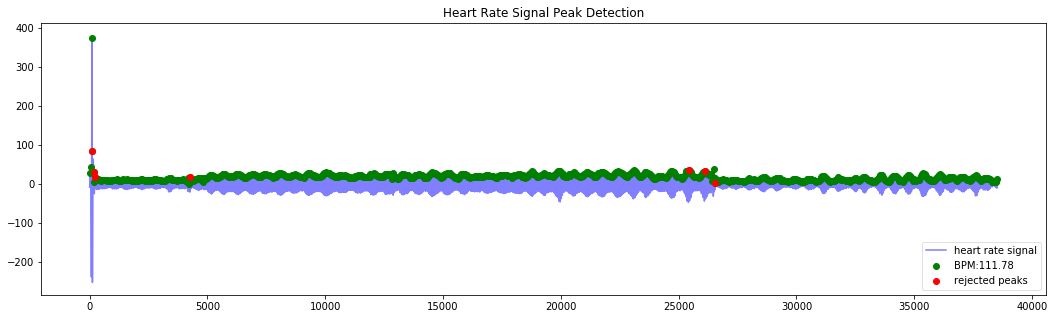

bpm: 111.777877
ibi: 536.778846
sdnn: 47.113942
sdsd: 23.984632
rmssd: 30.410558
pnn20: 0.267516
pnn50: 0.036397
hr_mad: 31.250000
sd1: 21.503396
sd2: 61.183433
s: 4133.241465
sd1/sd2: 0.351458
breathingrate: 0.106295


In [49]:
plt.figure(figsize=(18,5))

hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [52]:
print('hr: ' + str(m['bpm']))
print('hrv: ' + str(m['rmssd'])) ## hrv obtenu avec la méthode RMSSD

hr: 111.77787729511867
hrv: 30.410557734515407


## Partie analyse AED

In [54]:
df_aed= pd.read_csv(path_participant + 'EDA.csv', sep=';', header=None)

In [55]:
df_aed= df_aed.loc[2:]

Pour récupérer les données comprises entre les tags, copier coller le code utilisé plus haut et l'adapter avec le nom des variables

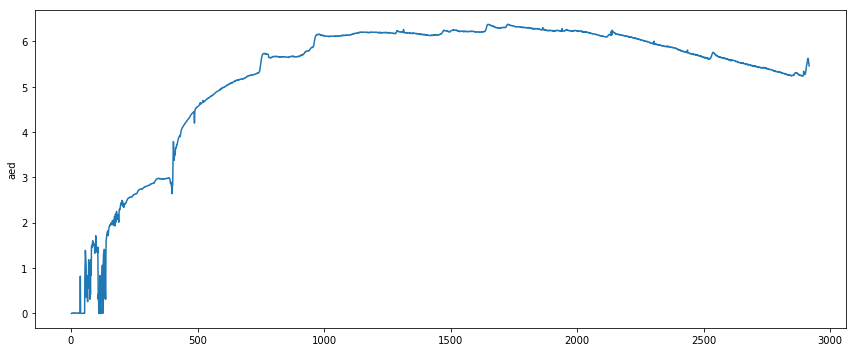

In [56]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_aed[0])
ax.set_ylabel('aed')
fig.tight_layout()